Refrence:https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b
# Linear Method:

## Principal Component Analysis (PCA):

PCA is one of my favourite machine learning algorithms. PCA is a linear dimensionality reduction technique (algorithm) that transforms a set of correlated variables (p) into a smaller k (k<p) number of uncorrelated variables called principal components while retaining as much of the variation in the original dataset as possible. In the context of Machine Learning (ML), PCA is an unsupervised machine learning algorithm which is used for dimensionality reduction.

## Factor Analysis (FA):

Factor Analysis (FA) and Principal Component Analysis (PCA) are both dimensionality reduction techniques. The main objective of Factor Analysis is not to just reduce the dimensionality of the data. Factor Analysis is a useful approach to find latent variables which are not directly measured in a single variable but rather inferred from other variables in the dataset. These latent variables are called factors.

## Linear Discriminant Analysis (LDA):

LDA is typically used for multi-class classification. It can also be used as a dimensionality reduction technique. LDA best separates or discriminates (hence the name LDA) training instances by their classes. The major difference between LDA and PCA is that LDA finds a linear combination of input features that optimizes class separability while PCA attempts to find a set of uncorrelated components of maximum variance in a dataset. Another key difference between the two is that PCA is an unsupervised algorithm whereas LDA is a supervised algorithm where it takes class labels into account.LDA for dimensionality reduction should not be confused with LDA for multi-class classification

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


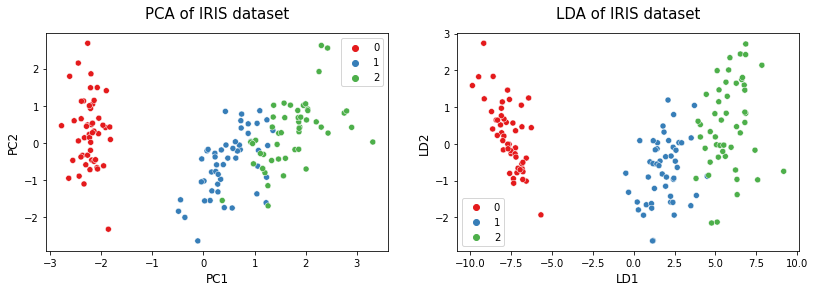

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_lda[:,0], X_lda[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[1].set_title("LDA of IRIS dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("LD1", fontsize=12)
ax[1].set_ylabel("LD2", fontsize=12)
plt.savefig('PCA vs LDA.png', dpi=80)

## Truncated Singular Value Decomposition (SVD):

This method performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). It works well with sparse data in which many of the row values are zero. In contrast, PCA works well with dense data. Truncated SVD can also be used with dense data. Another key difference between truncated SVD and PCA is that factorization for SVD is done on the data matrix while factorization for PCA is done on the covariance matrix.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


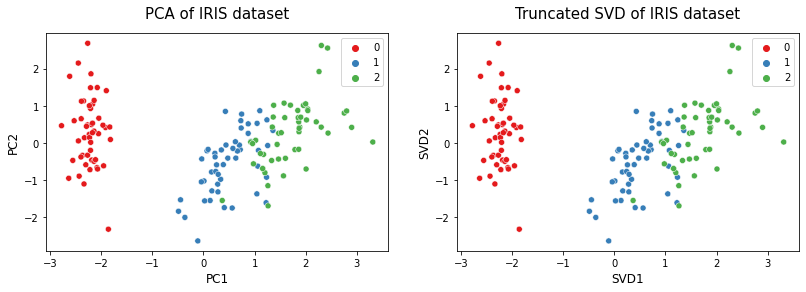

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

iris = load_iris()
X = iris.data
y = iris.target

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_svd[:,0], X_svd[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[1].set_title("Truncated SVD of IRIS dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("SVD1", fontsize=12)
ax[1].set_ylabel("SVD2", fontsize=12)
plt.savefig('PCA vs SVD.png', dpi=100)

# Non-linear methods (Manifold learning):

If we’re dealing with non-linear data which are frequently used in real-world applications, linear methods discussed so far do not perform well for dimensionality reduction. In this section, we’ll discuss four non-linear dimensionality reduction methods that can be used with non-linear data.

## Kernel PCA:
Kernel PCA is a non-linear dimensionality reduction technique which uses kernels. It can also be considered as the non-linear form of normal PCA. Kernel PCA works well with non-linear datasets where normal PCA cannot be used efficiently.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


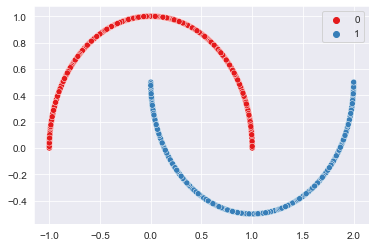

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
sns.set_style('darkgrid')

X, y = make_moons(n_samples = 500, random_state=42)
sns.scatterplot(X[:, 0], X[:, 1], hue=y, palette='Set1')
plt.savefig('Non-linear data.png')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


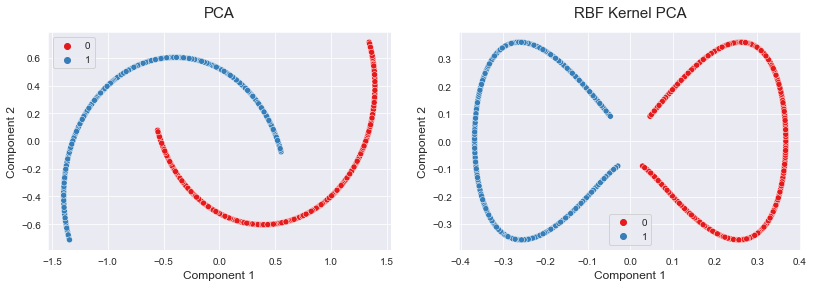

In [4]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_kpca[:, 0], X_kpca[:, 1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA", fontsize=15, pad=15)
ax[1].set_title("RBF Kernel PCA", fontsize=15, pad=15)
ax[0].set_xlabel("Component 1", fontsize=12)
ax[0].set_ylabel("Component 2", fontsize=12)
ax[1].set_xlabel("Component 1", fontsize=12)
ax[1].set_ylabel("Component 2", fontsize=12)
plt.savefig('PCA vs Kernel PCA.png', dpi=100)

## t-distributed Stochastic Neighbor Embedding (t-SNE):

This is also a non-linear dimensionality reduction method mostly used for data visualization. In addition to that, it is widely used in image processing and NLP. The Scikit-learn documentation recommends you to use PCA or Truncated SVD before t-SNE if the number of features in the dataset is more than 50. The following is the general syntax to perform t-SNE after PCA. Also, note that feature scaling is required before PCA.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


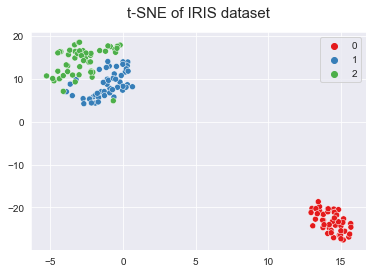

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
sns.set_style('darkgrid')

iris = load_iris()
X = iris.data
y = iris.target

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-SNE of IRIS dataset", fontsize=15, pad=15)
plt.savefig('t-SNE.png')